# K Means Implementation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.cluster import KMeans

### Iris dataset

*sepal* = Kelchblatt<br>
*petal* = Blütenblatt

In [2]:
iris = datasets.load_iris()
features = iris.data
feature_names = iris.feature_names
classes = iris.target
class_names = iris.target_names
data_description = iris.DESCR #for more information about the dataset
example_flower = dict(zip(feature_names, features[0]))

In [3]:
example_flower

{'sepal length (cm)': 5.1,
 'sepal width (cm)': 3.5,
 'petal length (cm)': 1.4,
 'petal width (cm)': 0.2}

In [4]:
features.shape

(150, 4)

In [5]:
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

## Sklearn approach

In [7]:
kmeans = KMeans(n_clusters=3, random_state=0, n_jobs=-1)
model = kmeans.fit(features)
klabels = model.labels_
centroids = kmeans.cluster_centers_

In [8]:
features.shape

(150, 4)

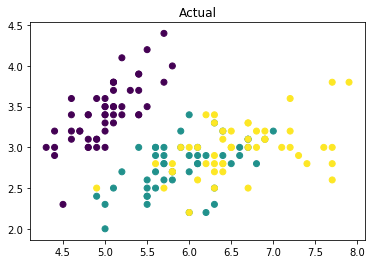

In [9]:
plt.scatter(features[:,0], features[:,1], c=classes)
plt.title("Actual")
plt.show()

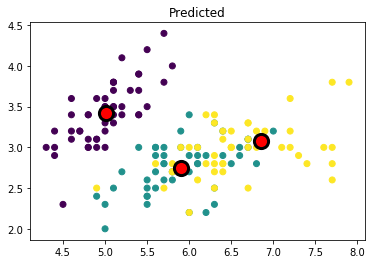

In [10]:
plt.scatter(features[:,0], features[:,1], c=classes)
plt.scatter(centroids[:, 0], 
            centroids[:, 1], 
            c="red", 
            marker="o", 
            s=200, 
            lw=3,
            edgecolor="black")
plt.title("Predicted")
plt.show()

## Implementation with numpy

#### helper functions

In [31]:
def calculate_cluster_mean(centroids, k_cluster):
    for cluster in k_cluster:
        centroids[cluster] = np.mean(k_cluster[cluster], axis=0)
    return centroids

def calculate_distance(data, centroids, k_cluster):
    for feature in data:
        distances = [get_distance(feature, centroids[centroid]) for centroid in centroids]
        cluster = distances.index(min(distances))
        k_cluster[cluster].append(feature)
    return k_cluster


def check_optimization(centroids, prev_centroids, tolerance):
    optimized = True
    
    for centroid in centroids:
        prev_centroid = prev_centroids[centroid]
        current_centroid = centroids[centroid]
        
        #TODO: euclidean distance nehmen
        if np.sum((current_centroid-prev_centroid)/prev_centroid*100.0) > tolerance:
            #print(np.sum((current_centroid-prev_centroid)/prev_centroid*100.0))
            optimized = False
            
    return optimized


def get_distance(x, y, metric="euclidean"):
    if metric == "euclidean":
        return np.sqrt(np.sum(np.power(x-y, 2)))
    else:
        print("Metric '{metric}' is unknown.")
        return None

def init_cluster(k):
    k_cluster = {}
    for i in range(k):
        k_cluster[i] = []
    return k_cluster

def init_centroids(data, k, random=False):
    centroids = {}
    if random:
        random_data = data[np.random.choice(np.arange(len(data)), k), :]
        for i in range(k):
            centroids[i] = random_data[i]
    else:
        centroids[i] = features[i]
    return centroids

#### main function

In [32]:
def my_kmeans(data, k, metric ="euclidean", max_iterations = 500, tolerance = 0.0001):
    
    iteration = 0
    # initalize (random) centroids
    centroids = init_centroids(data, k, random=True)

    while True:
        
        # initialize cluster
        k_cluster = init_cluster(k)
        
        # update k_cluster
        k_cluster = calculate_distance(data, centroids, k_cluster)
        
        prev_centroids = dict(centroids)
        
        # calculate mean of cluster
        centroids = calculate_cluster_mean(centroids, k_cluster)
        
        
        optimized = check_optimization(centroids, prev_centroids, tolerance)
    
        iteration += 1
        if iteration%100 == 0:
            print(f"Iteration: {iteration}/{max_iterations}")
            
            
        if iteration >= max_iterations or optimized:
            break
        
    return centroids

In [25]:
example_flower = dict(zip(feature_names, features[0]))
example_flower

{'sepal length (cm)': 5.1,
 'sepal width (cm)': 3.5,
 'petal length (cm)': 1.4,
 'petal width (cm)': 0.2}

In [24]:
iris = datasets.load_iris()
features = iris.data
features[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [22]:
features.shape

(150, 4)

In [12]:
def fit_kmeans(data, k):
    
    centroids = None
    # wie sehen meine Daten aus?
    # wie erhalte ich zufällige Datenpunkte?
    centroids = init_centroids(data, k)
    
    max_iteration = 500
    iteration = 0
    
    while True:
         
        # [[cl1], [cl2], [cl3]]
        # cl1 = [2.1, 3.5, 4.1, 5.6]
        k_cluster = init_k_cluster(k)
        
        # k_cluster sind vorher leer
        # data besteht aus allen Datenpunkten
        # centroids wurden am Anfang initialisiert, es sieht also k Punkte vorhanden
        k_cluster = calculate_distance(data, centroids, k_cluster)
        
        
        prev_centroids = centroids
        centroids = update_centroids(k_cluster, centroids)
        
        tolerance = 0.001
        optimized = check_optimization(centroids, prev_centroids, tolerance)
        
        iteration += 1
        
        if optimized or iteration >= max_iteration:
            break
    
    return centroids

5.00000000069889e-07

In [ ]:
optimized = True
    
    for centroid in centroids:
        prev_centroid = prev_centroids[centroid]
        current_centroid = centroids[centroid]
        
        if np.sum((current_centroid-prev_centroid)/prev_centroid*100.0) > tolerance:
            #print(np.sum((current_centroid-prev_centroid)/prev_centroid*100.0))
            optimized = False
            
    return optimized

In [35]:
np.sum((np.array([2,1]) - np.array([3,2]))/np.array([3,2])) * 100.0 > 0.001

False

In [30]:
a = np.array([1, 4])
b = np.array([2, 3])
np.sqrt(np.sum(np.power(a-b, 2)))

1.4142135623730951

In [132]:
my_model = my_kmeans(features, k=3, max_iterations=500)

In [133]:
my_model

{0: array([4.83333333, 3.16666667, 1.58055556, 0.29722222]),
 1: array([5.37058824, 3.8       , 1.51764706, 0.27647059]),
 2: array([6.30103093, 2.88659794, 4.95876289, 1.69587629])}

In [144]:
class K_Means:
    def __init__(self, k=4, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data):
        self.centroids = {}
        
        print(type(centroids))
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        print(type(centroids))

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            
            
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break
                
        return centroids

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [145]:
clf = K_Means()
a = clf.fit(features)

aa
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [127]:
a

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [32]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

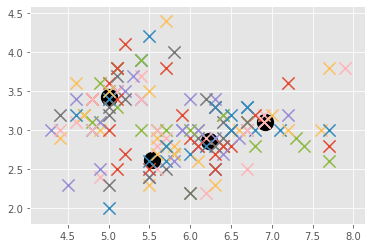

In [33]:
clf = K_Means()
clf.fit(features)
#clf.predict()

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    #color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", s=150, linewidths=5)
        
plt.show()

ValueError: operands could not be broadcast together with shapes (2,) (4,) 

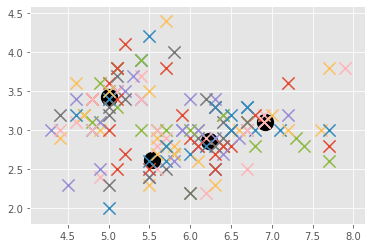

In [36]:
clf = K_Means()
clf.fit(features)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", s=150, linewidths=5)
        


unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)


plt.show()